In [1854]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import seaborn as sns; sns.set_theme()

In [1855]:
advertising = pd.read_csv("../../data/advertising.csv", index_col="Unnamed: 0")
advertising.head()

,TV,Radio,Newspaper,Sales
1,230.1,37.8,69.2,22.1
2,44.5,39.3,45.1,10.4
3,17.2,45.9,69.3,9.3
4,151.5,41.3,58.5,18.5
5,180.8,10.8,58.4,12.9


In [1856]:
advertising

,TV,Radio,Newspaper,Sales
1,230.1,37.8,69.2,22.1
2,44.5,39.3,45.1,10.4
3,17.2,45.9,69.3,9.3
4,151.5,41.3,58.5,18.5
5,180.8,10.8,58.4,12.9
...,...,...,...,...
196,38.2,3.7,13.8,7.6
197,94.2,4.9,8.1,9.7
198,177.0,9.3,6.4,12.8
199,283.6,42.0,66.2,25.5


In [1857]:
advertising[advertising.columns] = StandardScaler().fit_transform(advertising)
advertising.head()

,TV,Radio,Newspaper,Sales
1,0.969852,0.981522,1.778945,1.552053
2,-1.197376,1.082808,0.669579,-0.696046
3,-1.516155,1.528463,1.783549,-0.907406
4,0.052050,1.217855,1.286405,0.860330
5,0.394182,-0.841614,1.281802,-0.215683


GPR example

In [1858]:
from sklearn.datasets import make_friedman2
from sklearn.gaussian_process.kernels import DotProduct, WhiteKernel

X, y = make_friedman2(n_samples=500, noise=0, random_state=0)
kernel = DotProduct() + WhiteKernel()
gpr = GaussianProcessRegressor(kernel=kernel, random_state=0).fit(X, y)
gpr.score(X, y)
gpr.predict(X[:1,:], return_std=True), X.shape, y.shape

c:\Users\nikok\mambaforge\envs\oml\Lib\site-packages\sklearn\gaussian_process\kernels.py:420: ConvergenceWarning: The optimal value found for dimension 0 of parameter k1__sigma_0 is close to the specified lower bound 1e-05. Decreasing the bound and calling fit again may find a better value.
  warnings.warn(
c:\Users\nikok\mambaforge\envs\oml\Lib\site-packages\sklearn\gaussian_process\kernels.py:430: ConvergenceWarning: The optimal value found for dimension 0 of parameter k2__noise_level is close to the specified upper bound 100000.0. Increasing the bound and calling fit again may find a better value.
  warnings.warn(


((array([653.08792288]), array([316.68016218])), (500, 4), (500,))

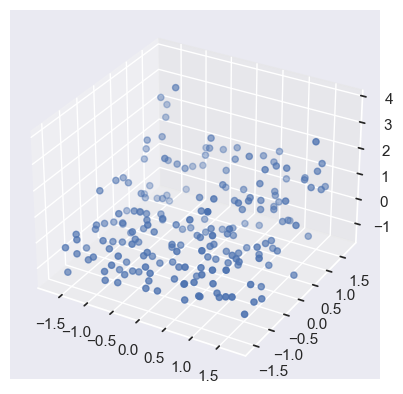

In [1859]:
X = advertising[["TV", "Radio", "Newspaper"]].to_numpy()
y = advertising["Sales"].to_numpy()
ax = plt.figure().add_subplot(projection = "3d")
ax.scatter3D(X.T[0], X.T[1], X.T[2])

Correlation between each of the xs to y

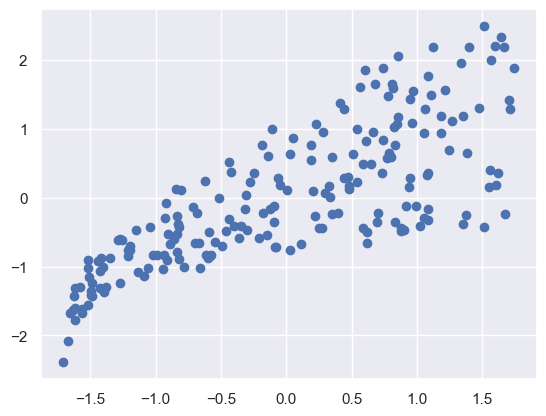

In [1860]:
plt.scatter(advertising["TV"], advertising["Sales"])

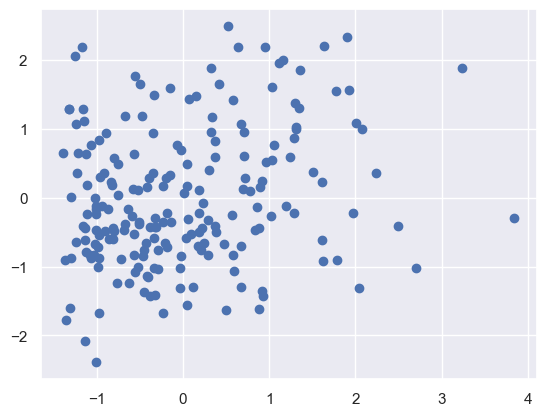

In [1861]:
plt.scatter(advertising["Newspaper"], advertising["Sales"])

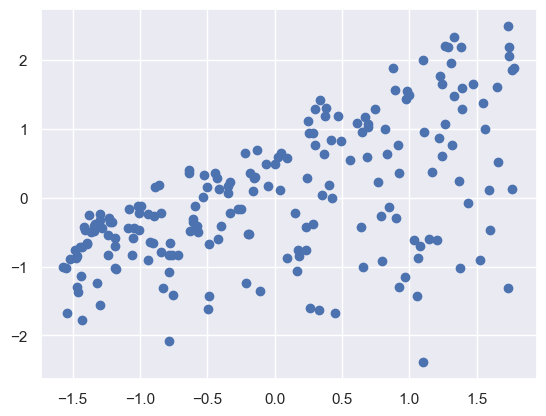

In [1862]:
plt.scatter(advertising["Radio"], advertising["Sales"])

PCA to reduce input dims to 2

[16.55809475 14.02323885]


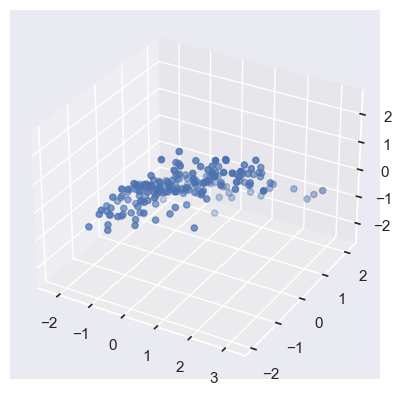

In [1863]:
pca = PCA(n_components=2)
X = pca.fit_transform(X)
print(pca.singular_values_)
ax = plt.figure().add_subplot(projection = "3d")
ax.scatter3D(X.T[0], X.T[1], y)

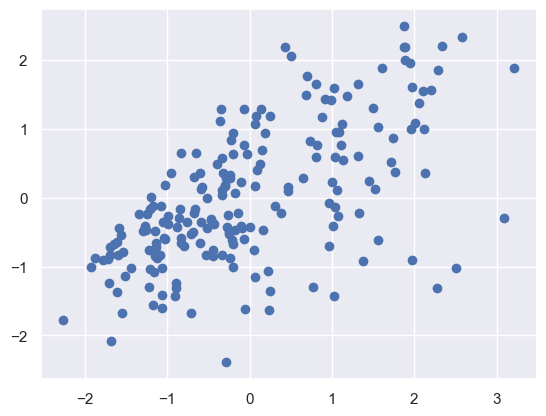

In [1864]:
plt.scatter(X.T[0], y)

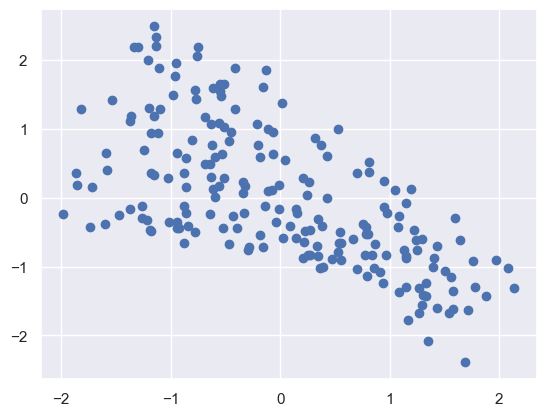

In [1865]:
plt.scatter(X.T[1], y)

In [1866]:
gpr = GaussianProcessRegressor(normalize_y=True)
gpr.fit(X, y)

GaussianProcessRegressor(normalize_y=True)

In [1867]:
X[0]

array([ 2.1111237 , -0.54502721])

In [1868]:
gpr.predict(X[:1,:])

array([1.56023407])

In [1869]:
np.min(X.T[0]), np.max(X.T[0]), np.min(X.T[1]), np.max(X.T[1])

(-2.2654077269492543,
 3.211688086776323,
 -1.980987088071259,
 2.1344416714158383)

In [1870]:
u = np.linspace(-2.275, 3.25, 1000)
v = np.linspace(-2, 2.125, 1000)
U, V = np.meshgrid(u, v)
U.shape, V.shape, U, V

((1000, 1000),
 (1000, 1000),
 array([[-2.275     , -2.26921922, -2.26343844, ...,  3.48843844,
          3.49421922,  3.5       ],
        [-2.275     , -2.26921922, -2.26343844, ...,  3.48843844,
          3.49421922,  3.5       ],
        [-2.275     , -2.26921922, -2.26343844, ...,  3.48843844,
          3.49421922,  3.5       ],
        ...,
        [-2.275     , -2.26921922, -2.26343844, ...,  3.48843844,
          3.49421922,  3.5       ],
        [-2.275     , -2.26921922, -2.26343844, ...,  3.48843844,
          3.49421922,  3.5       ],
        [-2.275     , -2.26921922, -2.26343844, ...,  3.48843844,
          3.49421922,  3.5       ]]),
 array([[-2.        , -2.        , -2.        , ..., -2.        ,
         -2.        , -2.        ],
        [-1.99587087, -1.99587087, -1.99587087, ..., -1.99587087,
         -1.99587087, -1.99587087],
        [-1.99174174, -1.99174174, -1.99174174, ..., -1.99174174,
         -1.99174174, -1.99174174],
        ...,
        [ 2.11674174,  2

In [1871]:
a = np.expand_dims(np.ravel(U), 1)
a.shape, a

((1000000, 1),
 array([[-2.275     ],
        [-2.26921922],
        [-2.26343844],
        ...,
        [ 3.48843844],
        [ 3.49421922],
        [ 3.5       ]]))

In [1872]:
a = np.concatenate([np.expand_dims(np.ravel(U), axis=1), np.expand_dims(np.ravel(V), axis=1)], axis=1)
a.shape, a

((1000000, 2),
 array([[-2.275     , -2.        ],
        [-2.26921922, -2.        ],
        [-2.26343844, -2.        ],
        ...,
        [ 3.48843844,  2.125     ],
        [ 3.49421922,  2.125     ],
        [ 3.5       ,  2.125     ]]))

In [1873]:
zs = gpr.predict(a)
zs.shape, zs

((1000000,),
 array([-3096.70645165, -3056.04925084, -3015.57066262, ...,
          563.75041099,   568.98828784,   574.21414057]))

In [1874]:
Z = np.reshape(zs, U.shape)
Z.shape, Z

((1000, 1000),
 array([[-3096.70645165, -3056.04925084, -3015.57066262, ...,
          3813.79645264,  3800.65985233,  3787.36848396],
        [-3067.00781953, -3026.69722688, -2986.56452394, ...,
          3775.93739182,  3762.92346674,  3749.75774592],
        [-3037.44793642, -2997.48260522, -2957.69443882, ...,
          3738.17140204,  3725.28022557,  3712.2402308 ],
        ...,
        [  642.81035471,   633.12733889,   623.52719748, ...,
           554.03503387,   559.21217404,   564.37781882],
        [  648.08506036,   638.34105456,   628.68046367, ...,
           558.90614585,   564.11357206,   569.30923722],
        [  653.36235344,   643.55767882,   633.83696485, ...,
           563.75041099,   568.98828784,   574.21414057]]))

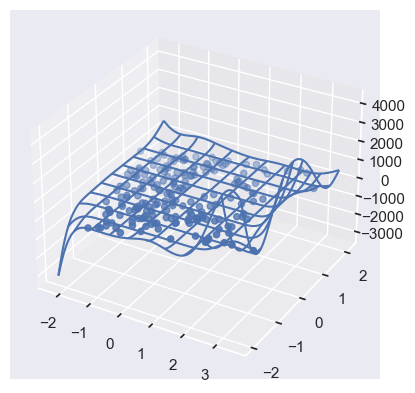

In [1875]:
ax = plt.figure().add_subplot(projection = "3d")
ax.scatter3D(X.T[0], X.T[1], y)
ax.plot_wireframe(U, V, Z, rstride=100, cstride=100)
# ax.set_zlim3d(-10, 10)

In [1876]:
X.T[1:].T.shape

(200, 1)

In [1877]:
np.expand_dims(u, axis=1).shape

(1000, 1)

In [1878]:
z1, std1 = gpr.fit(X.T[:1].T, y).predict(np.expand_dims(u, axis=1), return_std=True)
z2, std2 = gpr.fit(X.T[1:].T, y).predict(np.expand_dims(v, axis=1), return_std=True)

In [1879]:
std1[:5]

array([1.44505504e-05, 1.09550597e-05, 9.98840852e-06, 1.15074260e-05,
       1.43053864e-05])

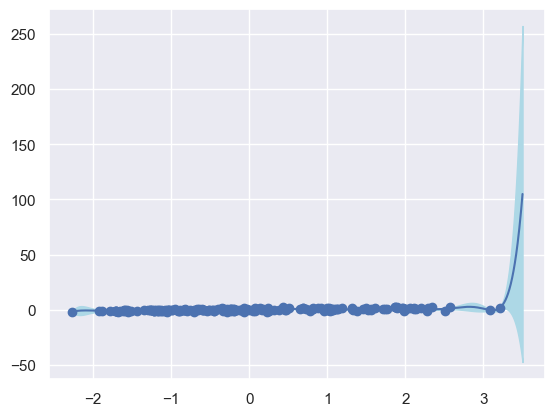

In [1880]:
plt.fill_between(u, z1 - 1e5*std1, z1 + 1e5*std1, color="lightblue")
plt.scatter(X.T[0], y)
plt.plot(u, z1)

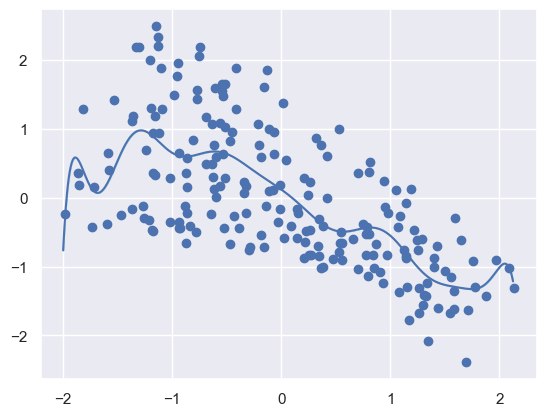

In [1881]:
plt.fill_between(v, z2 - std2, z2 + std2, color="lightblue")
plt.scatter(X.T[1], y)
plt.plot(v, z2)

In [1882]:
U[0], V[0], Z[0]

(array([-2.27500000e+00, -2.26921922e+00, -2.26343844e+00, -2.25765766e+00,
        -2.25187688e+00, -2.24609610e+00, -2.24031532e+00, -2.23453453e+00,
        -2.22875375e+00, -2.22297297e+00, -2.21719219e+00, -2.21141141e+00,
        -2.20563063e+00, -2.19984985e+00, -2.19406907e+00, -2.18828829e+00,
        -2.18250751e+00, -2.17672673e+00, -2.17094595e+00, -2.16516517e+00,
        -2.15938438e+00, -2.15360360e+00, -2.14782282e+00, -2.14204204e+00,
        -2.13626126e+00, -2.13048048e+00, -2.12469970e+00, -2.11891892e+00,
        -2.11313814e+00, -2.10735736e+00, -2.10157658e+00, -2.09579580e+00,
        -2.09001502e+00, -2.08423423e+00, -2.07845345e+00, -2.07267267e+00,
        -2.06689189e+00, -2.06111111e+00, -2.05533033e+00, -2.04954955e+00,
        -2.04376877e+00, -2.03798799e+00, -2.03220721e+00, -2.02642643e+00,
        -2.02064565e+00, -2.01486486e+00, -2.00908408e+00, -2.00330330e+00,
        -1.99752252e+00, -1.99174174e+00, -1.98596096e+00, -1.98018018e+00,
        -1.9